Vincent Broda CS522 Project 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from numpy.ma.core import sort

Reading in data, then separating it

In [ ]:
data_tran = pd.read_csv('/synth.tr', delim_whitespace=True)
# tranning data
xs_tran = data_tran['xs']
ys_tran = data_tran['ys']
yc_tran = data_tran['yc']
# means
xs_mean_tran = np.mean(xs_tran)
ys_mean_tran = np.mean(ys_tran)
mean_tran = np.array([xs_mean_tran, ys_mean_tran])
# standard deviations
xs_sd_tran = np.std(xs_tran)
ys_sd_tran = np.std(ys_tran)
# variance
xs_var_tran = np.var(xs_tran)
ys_var_tran = np.var(ys_tran)

# to get matrixes
feature_matrix = np.column_stack((xs_tran -xs_mean_tran , ys_tran - ys_mean_tran))
covar_matrix = np.cov(feature_matrix, rowvar=False)

# getting testing data
data_test = pd.read_csv('/synth.te', delim_whitespace=True)
xs_test = data_test['xs']
ys_test = data_test['ys']
yc_test = data_test['yc']

# sized of sets
tran_size = len(xs_tran)
test_size = len(xs_test)

Task 1

(5 pts) Show a scatter plot of the training set of the two classes. From visual inspection, do you think single-modal Gaussian is a good/reasonable model for the pdf?

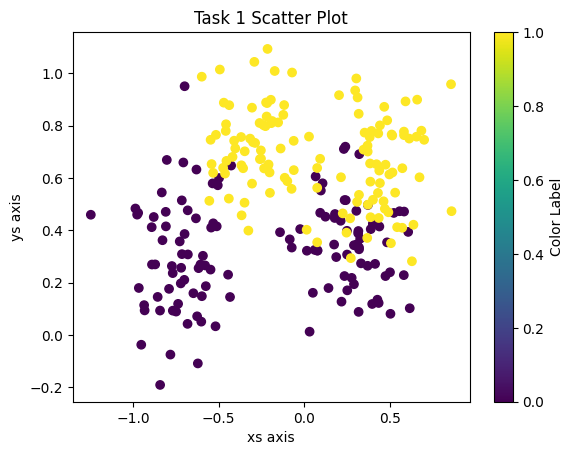

In [ ]:
plt.scatter(xs_tran, ys_tran, c=yc_tran, cmap='viridis')
plt.colorbar(label='Color Label')
plt.xlabel('xs axis')
plt.ylabel('ys axis')
plt.title('Task 1 Scatter Plot')
plt.show()

From a visual inspection of the data, I think that a single gaussian would not be the best model for the pdf, as their is some clear overlap in the data.

Task 2

(15 pts) Plot a figure with the x-axis showing the different "k" values in kNN and the y-axis showing the overall classification accuracy.


In [ ]:
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [ ]:
# Since i have the tranning and testing set allready loaded in, i'm only passing though the abount of neighbors to use
def kNN_classifier_accuracy(k):

  test_classifications = []
  # for every test sample
  for t in range(test_size):
    distance_dict = {}
    # Find all of the distances from the current testing point
    # this is slow because I am doing this calculation everytime, insetead of just storing it.
    for i in range(tran_size):
      distance = euclidean_distance(xs_tran[i], ys_tran[i], xs_test[t], ys_test[t])
      distance_dict[distance] = i
    # sorting it by the key, which is the distance between the two points
    sorted_distance = sorted(distance_dict)
    # picking the k closest, aka the k points with the smallest distances
    k_distances = []
    k_yc = []
    for i in range(k):
      k_distances.append(sorted_distance[i])
      data_point = distance_dict[k_distances[i]]
      k_yc.append(yc_tran[data_point])
    # now we are since we have the specific data we want, we will classify as 0 when their are more zeros, and 1 if their are more ones
    # we will pick 1 if this number is tied(arbitrairaly done but makes sence if you think of averages and rounding up form .5)
    zeros = 0;
    ones = 0;
    for i in range(k):
      if k_yc[i] == 0:
        zeros += 1
      elif k_yc[i] == 1:
        ones += 1

    if zeros > ones:
      classification = 0;
    elif ones >=  ones:
      classification = 1;
    test_classifications.append(classification)

  return test_classifications

24
0


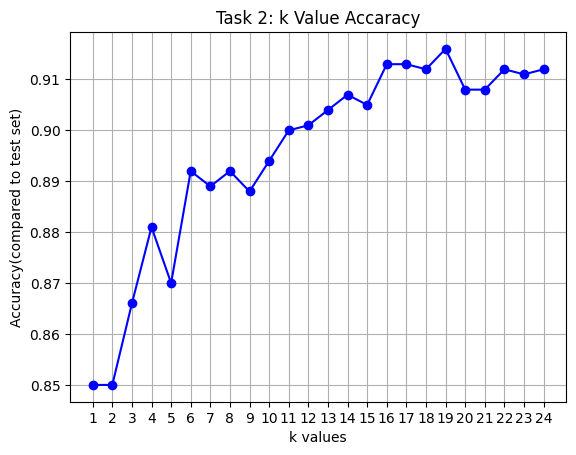

In [ ]:
accuracy_scores = []
test_size = len(yc_test)
k_values = range(1, 25) # picked 1-25 to show for k values, when i got higher like to 50 which is what i did to find the best k value, it was hard to read the graph
best_accuracy = 0
best_k = 0;
# getting the kNN classification accuracy from a set number of k valyes
for k in k_values:
  k_test = kNN_classifier_accuracy(k)
  errors = 0
  for j in range(test_size):
    if k_test[j] != yc_test[j]:
      errors += 1
  accuracy = (test_size - errors) / test_size
  accuracy_scores.append(accuracy)
  if accuracy > best_accuracy:
    best_accuracy = 0;
    best_k = k

print(best_k)
print(best_accuracy)

# Create a plot
#plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Task 2: k Value Accaracy')
plt.xlabel('k values')
plt.ylabel('Accuracy(compared to test set)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

I am going forward with k=19 as the best option. Based on the tabl. If we do a lot more k's we will get a better option, however it is only marginal and I feel like that might just be due to chance anyways.

Task 3:
(50 pts) Assuming equal prior probability, generate a table summarizing the overall classification accuracy, classwise accuracy, and run time of the four supervised learning algorithms, with each row indicating a learning algorithm and each column indicating a performance metric. For kNN, choose the best "k" you obtained from Task 2.


In [ ]:
import time


# setting globals that will be used here
test_zeros = 0
test_ones = 0
for num in yc_test:
  if num == 0:
    test_zeros += 1
  if num == 1:
    test_ones += 1
# takes in some classifications and tells the error based on the test set
def overall_accuracy(yc):
  errors = 0
  for i in range(test_size):
    if yc[i] != yc_test[i]:
      errors += 1
  return (test_size - errors) / test_size

# returns accuracy for both labels
def classwise_accuracy(yc):
  correct_zeros = 0
  correct_ones = 0
  for i in range(test_size):
    if yc[i] == 0 and yc_test[i] == 0:
      correct_zeros += 1
    if yc[i] == 1 and yc_test[i] == 1:
      correct_ones += 1
  return correct_zeros/test_zeros, correct_ones/test_ones

In [ ]:
# basically getting the closest value here, same as the knn earlier basically if k = 1
# I am just having it take in the test becuse of how i am using it. The training is set and will remain constant
def min_euclidean_distance_classifier(test_x, test_y):
  distances = []
  for i in range(len(xs_tran)):
    distances.append(math.sqrt((xs_tran[i] - test_x) ** 2 + (ys_tran[i] - test_y) ** 2))
  # was having trouble returning then this fixed it
  if len(yc_tran) > 0 and len(yc_tran) == len(distances):
    return yc_tran[np.argmin(distances)]

# now doing calcs
euclidean_test_classifications = []
#min_euclidean_distance_classifier(test_x=0, test_y=0)
start = time.time()
for i in range(test_size):
  test_class = min_euclidean_distance_classifier(xs_test[i], ys_test[i])
  euclidean_test_classifications.append(test_class)
end = time.time()

euclidian_overall_accuracy = overall_accuracy(euclidean_test_classifications)
euclidian_classwise_accuracy = classwise_accuracy(euclidean_test_classifications)
euclidian_time = end - start

print(euclidian_overall_accuracy)
print(euclidian_classwise_accuracy)
print(euclidian_time)

0.85
(0.862, 0.838)
1.1682698726654053


In [ ]:
from scipy.spatial import distance
from scipy.linalg import inv

def min_mahalanobis_distance_classifier(test_x, test_y):
  distances = []
  test_p = np.array([test_x, test_y])
  for i in range(tran_size):
    tran_p = np.array([xs_tran[i], ys_tran[i]])
    m_dis = distance.mahalanobis(test_p, tran_p, inv(covar_matrix))
    distances.append(m_dis)
  if len(yc_tran) > 0 and len(yc_tran) == len(distances):
    return yc_tran[np.argmin(distances)]

# now doing calcs
mahalanobis_test_classifications = []
#min_euclidean_distance_classifier(test_x=0, test_y=0)
start = time.time()
for i in range(test_size):
  test_class = min_mahalanobis_distance_classifier(xs_test[i], ys_test[i])
  mahalanobis_test_classifications.append(test_class)
end = time.time()

mahalanobis_overall_accuracy = overall_accuracy(mahalanobis_test_classifications)
mahalanobis_classwise_accuracy = classwise_accuracy(mahalanobis_test_classifications)
mahalanobis_time = end - start

print(mahalanobis_overall_accuracy)
print(mahalanobis_classwise_accuracy)
print(mahalanobis_time)

0.856
(0.87, 0.842)
7.710543394088745


In [ ]:
zero_avg = test_zeros / test_size
one_avg = test_ones / test_size
# doing the generic form of the baysian rule now
def g_likelyhood(x, mu, sigma):
  exponent = -0.5 * np.dot(np.dot((x - mu).T, inv(sigma)), (x - mu))
  return (1.0 / ((2 * np.pi) ** (len(x) / 2) * np.sqrt(np.linalg.det(sigma)))) * np.exp(exponent)

# being made specificaly for 2d. Getting just the likelihood, since the other parts of it are basically just scalars
def min_bayesian_classifier(test_x, test_y):
  distances = []
  test_p = np.array([test_x, test_y])
  likelihood_zero = g_likelyhood(test_p, zero_avg, covar_matrix)
  likelihood_one = g_likelyhood(test_p, one_avg, covar_matrix)
  together = np.array([likelihood_zero, likelihood_one])
  return np.argmax(together)

# now doing calcs
bayesian_test_classifications = []
start = time.time()
for i in range(test_size):
  test_class = min_bayesian_classifier(xs_test[i], ys_test[i])
  bayesian_test_classifications.append(test_class)
end = time.time()

bayesian_overall_accuracy = overall_accuracy(bayesian_test_classifications)
bayesian_classwise_accuracy = classwise_accuracy(bayesian_test_classifications)
bayesian_time = end - start

print(bayesian_overall_accuracy)
print(bayesian_classwise_accuracy)
print(bayesian_time)

0.5
(1.0, 0.0)
0.0863180160522461


In [ ]:
# baised on my previous knn function but simplified
def kNN_classifier(test_x, test_y, k):
  distance_dict = {}
  # Find all of the distances from the current testing point
  # this is slow because I am doing this calculation everytime, insetead of just storing it.
  for i in range(tran_size):
    distance = euclidean_distance(test_x, test_y, xs_tran[i], ys_tran[i])
    distance_dict[distance] = i
  # sorting it by the key, which is the distance between the two points
  sorted_distance = sorted(distance_dict)

  # picking the k closest, aka the k points with the smallest distances
  k_yc = []
  for i in range(k):
    k_distances = sorted_distance[i]
    data_point = distance_dict[k_distances]
    k_yc.append(yc_tran[data_point])
  # now we are since we have the specific data we want, we will classify as 0 when their are more zeros, and 1 if their are more ones
  # we will pick 1 if this number is tied(arbitrairaly done but makes sence if you think of averages and rounding up form .5)
  zeros = 0;
  ones = 0;
  for i in range(k):
    if k_yc[i] == 0:
      zeros += 1
    elif k_yc[i] == 1:
      ones += 1

  if zeros > ones:
    classification = 0;
  elif ones >=  ones:
    classification = 1;

  return classification

# now doing calcs
knn_test_classifications = []
start = time.time()
for i in range(test_size):
  test_class = kNN_classifier(xs_test[i], ys_test[i], 19)
  knn_test_classifications.append(test_class)
end = time.time()

knn_overall_accuracy = overall_accuracy(knn_test_classifications)
knn_classwise_accuracy = classwise_accuracy(knn_test_classifications)
knn_time = end - start

#print(knn_overall_accuracy)
#print(knn_classwise_accuracy)
#print(knn_time)

0.916
(0.926, 0.906)
1.2020776271820068


In [ ]:
# All results put into a dictionary
results = [
    {
        "algorithm": "Minimum Euclidean Distance",
        "overall_accuracy": euclidian_overall_accuracy,
        "classwise_accuracy": euclidian_classwise_accuracy,
        "runtime": euclidian_time,
    },
    {
        "algorithm": "Minimum Mahalanobis Distance",
        "overall_accuracy": mahalanobis_overall_accuracy,
        "classwise_accuracy": mahalanobis_classwise_accuracy,
        "runtime": mahalanobis_time,
    },
    {
        "algorithm": "General Bayesian",
        "overall_accuracy": bayesian_overall_accuracy,
        "classwise_accuracy": bayesian_classwise_accuracy,
        "runtime": bayesian_time,
    },
    {
        "algorithm": "kNN",
        "overall_accuracy": knn_overall_accuracy,
        "classwise_accuracy": knn_classwise_accuracy,
        "runtime": knn_time,
    }
]
# Formated all the results to print into tabel
print("Algorithm | Overall Classification Accuracy | Classwise Accuracy (zero, one) | Runtime")
for result in results:
    print(
        f"{result['algorithm']:36} | {result['overall_accuracy'] * 100:.2f}%"
        f" | {result['classwise_accuracy'][0] * 100:.2f}%, {result['classwise_accuracy'][1] * 100:.2f}%"
        f" | {result['runtime']:.2f} seconds"
    )


Algorithm | Overall Classification Accuracy | Classwise Accuracy (zero, one) | Runtime
Minimum Euclidean Distance           | 85.00% | 86.20%, 83.80% | 1.17 seconds
Minimum Mahalanobis Distance         | 85.60% | 87.00%, 84.20% | 6.22 seconds
General Bayesian                     | 50.00% | 100.00%, 0.00% | 0.09 seconds
kNN                                  | 91.60% | 92.60%, 90.60% | 1.20 seconds


Task 4:
(10 pts) Provide a comprehensive discussion (0.5 ~ 1 page) on the results shown in the table, including the effect of using different assumptions of the covariance matrices.


The results of the tabel helped to confirm what I allready thought would happen, being kNN would be the best algorithm, as it clearly preformed the best out of the other options here. For some reason, I also thought it would have a significasntly bigger runtime over minimum euclidean distance, however after thinking about this I belive the results make sence, since I implimented them so similarly. I also noticed tha the Classwise accuracy always tends to be higher on the zero side, I belive this is due to the covariance and I am sure if we inspected the covariance matrix we would see evidence supporting this. I also found it intresting how much longer Mahalanobis took, as if was not even close to the other, but at lest it was better than Euclidean which makes sence becuase of the covariance. All of this being said, I am a bit unsure of why fthe general Bayesian is the way it is, I think it is because their are 500 zeros and 500 1's, but I am not convinced of this. I may have made a mistake in my code somewhere.
Still, after getting to this point I see how these algorithms might start to take forever, and why efficiency is important because of this.

Task 5:
(15 pts) Using the synthetic dataset, illustrate the four decision boundaries from the three cases of parametric learning algorithms on the same figure as the scatter plot of the testing dataset. The fourth one should be that from kNN (with the best "k"). Note that for kNN, there won't be an analytical equation to describe the boundary. Comment on the differences.


For kNN with k = 19, the decision boundry will represent a circle around point we are looking around. Its radious will change based on the density of the data, the more dense the smaller and the less dense the larger.
Their isn't to much of a diffrence in the distance ones, which makes sence I belive since they use the same basic idea. However that is diffrent for the general Bayesian since that one had very diffrent results. To be fair, the basican desision boundry fits with the results I got from it, being basically all zero I belive. I would have thought that the boundries for the two minimum distance would have been straighter, but again that makes sence with how the data looks visually.

In [ ]:
x_min, x_max = min(xs_test) - 1, max(xs_test) + 1
y_min, y_max = min(ys_test) - 1, max(ys_test) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

euclidean_mesh_grid_classifications = np.zeros_like(xx)
mahalanobis_mesh_grid_classifications = np.zeros_like(xx)
bayesian_mesh_grid_classifications = np.zeros_like(xx)

# Sorry its not all on one graph, also sorry for how long the mesh grid part takes, I am unsure on how to make it better

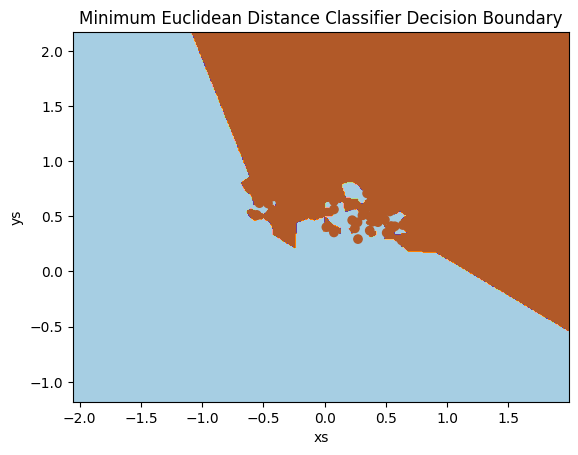

In [ ]:
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        euclidean_mesh_grid_classifications[i, j] = min_euclidean_distance_classifier(xx[i, j], yy[i, j])
plt.contourf(xx, yy, euclidean_mesh_grid_classifications, cmap=plt.cm.Paired)
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Minimum Euclidean Distance Classifier Decision Boundary")
plt.scatter(xs_tran, ys_tran, c=yc_tran, cmap=plt.cm.Paired)  # gets rid of dots
plt.show()

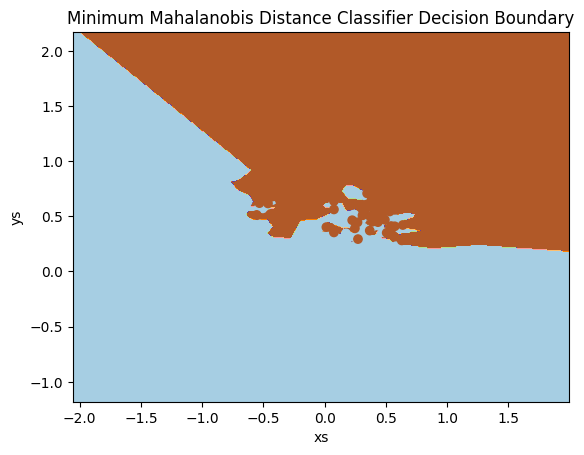

In [ ]:
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        mahalanobis_mesh_grid_classifications[i, j] = min_mahalanobis_distance_classifier(xx[i, j], yy[i, j])
plt.contourf(xx, yy, mahalanobis_mesh_grid_classifications, cmap=plt.cm.Paired)
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Minimum Mahalanobis Distance Classifier Decision Boundary")
plt.scatter(xs_tran, ys_tran, c=yc_tran, cmap=plt.cm.Paired)  # gets rid of dots
plt.show()

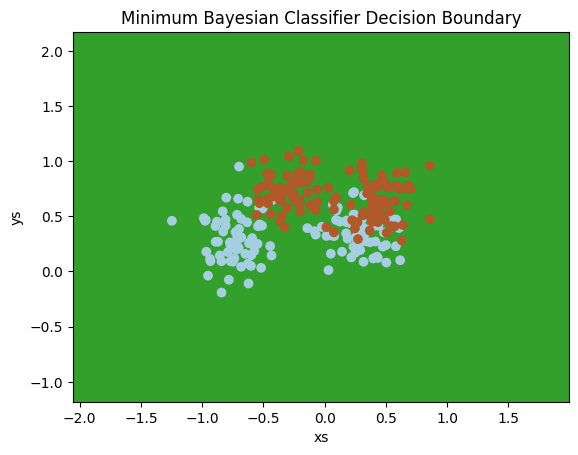

In [ ]:
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        bayesian_mesh_grid_classifications[i, j] = min_bayesian_classifier(xx[i, j], yy[i, j])
plt.contourf(xx, yy, bayesian_mesh_grid_classifications, cmap=plt.cm.Paired)
plt.xlabel("xs")
plt.ylabel("ys")
plt.title("Minimum Bayesian Classifier Decision Boundary")
plt.scatter(xs_tran, ys_tran, c=yc_tran, cmap=plt.cm.Paired)  # gets rid of dots
plt.show()

Task 6:
(5 pts) Final discussion.

Overall, I feel like I learned a lot doing this project. I feel like I understand what to do with the functions(algorithms) more, what the data means, and how it all corrolates. If I where to do it over, I would use the code I have allready to help me structure and plan out what I would do first. I think this would help clean up my code a lot, as well as improve the preformance of task 2. I belive I know why it is taking so long, however I ran out of time to fix it at the molment. I am also going to make sure I give myself more time for the next project. I thought I startred earlier enough, but I think I just need to dedicate more time thought the week to spend on this class going forward to ensure I can do my best.
